In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import cv2
from models.murel.networks.MurelNet import MurelNet
from dataset.VQAv2Dataset import VQAv2Dataset
import yaml
import torch
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
with open('../models/murel/configs/murel.yaml') as f:
    config = yaml.load(f)

    
train_dataset = VQAv2Dataset(split="train",
                            txt_enc=config['txt_enc'],
                            bottom_up_features_dir=config['bottom_up_features_dir'],
                            skipthoughts_dir=config['skipthoughts_dir'],
                            processed_dir=config['processed_dir'],
                            ROOT_DIR=config['ROOT_DIR'],
                            vqa_dir=config['vqa_dir'])

train_loader = DataLoader(train_dataset, 
                          shuffle=False,
                          batch_size=1,
                          num_workers=config['num_workers'],
                          collate_fn=train_dataset.collate_fn)

train_iter = iter(train_loader)

/home/bat34/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


In [3]:
config['fusion']['final_fusion']['output_dims'] = 3000
model = MurelNet(config, train_dataset.wid_to_word)

In [4]:
best_model_name = 'murel_dropout_seed_1337_loss_function_NLLLoss_txt_enc_BayesianUniSkip_pooling_agg_max_pairwise_agg_max_batch_size_256_lr_0.0003_lr_decay_rate_0.25_unroll_steps_3_fusion_type_block'
x = torch.load('../models/murel/trained_models/best_models/{}/best_model.pth'.format(best_model_name))
model.load_state_dict(x['model'])
model.initialise_buffers()

In [307]:
data = train_iter.next()

In [308]:
# reconstruct question
question_reconstr = [train_dataset.wid_to_word[id.item()] for id in list(data['question_ids'])[0]]
question_reconstr

['is', 'this', 'photo', 'in', 'color']

In [309]:
data['answer']

['no']

In [310]:
model.initialise_buffers()
with torch.no_grad():
    output = model(data)
buffer = model.buffer
_, arg = torch.max(output, dim=1)
train_dataset.aid_to_ans[arg]

IndexError: list index out of range

In [ ]:
train_dataset.

In [296]:
img = cv2.imread('/home/bat34/VQA/visualise_images/{}'.format(data['image_name'][0]), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_img = img.copy()

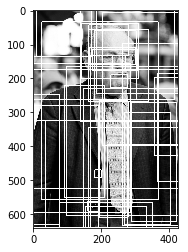

In [297]:
bounding_boxes = data['bounding_boxes'].tolist()[0]

for bb in bounding_boxes:
    x1, y1, x2, y2 = bb
    x1, x2 = int(x1 * img.shape[1]), int(x2 * img.shape[1])
    y1, y2 = int(y1 * img.shape[0]), int(y2 * img.shape[0])
    new_img = cv2.rectangle(new_img, (x1, y1), (x2, y2), (255, 255, 255), 2)    

plt.imshow(new_img)
plt.show()

In [298]:
curr = buffer[0]['argmax'].tolist()[0]

curr_count = Counter(curr)

new_img = img.copy()
for i, bb in enumerate(bounding_boxes):
    x1, y1, x2, y2 = bb
    x1, x2 = int(x1 * img.shape[1]), int(x2 * img.shape[1])
    y1, y2 = int(y1 * img.shape[0]), int(y2 * img.shape[0])
    sub_img = img[y1: y2, x1: x2]
    white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255
    res = cv2.addWeighted(sub_img, 1-curr_count[i]/2048, white_rect, curr_count[i]/2048, 1.0)
    new_img[y1:y2, x1: x2] = np.maximum(new_img[y1:y2, x1:x2], res)

In [301]:
curr = buffer[1]['argmax'].tolist()[0]

curr_count = Counter(curr)

new_img = img.copy()
for i, bb in enumerate(bounding_boxes):
    x1, y1, x2, y2 = bb
    x1, x2 = int(x1 * img.shape[1]), int(x2 * img.shape[1])
    y1, y2 = int(y1 * img.shape[0]), int(y2 * img.shape[0])
    sub_img = img[y1: y2, x1: x2]
    white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255
    res = cv2.addWeighted(sub_img, 1-curr_count[i]/2048, white_rect, curr_count[i]/2048, 1.0)
    new_img[y1:y2, x1: x2] = np.maximum(new_img[y1:y2, x1:x2], res)

In [302]:
plt.imshow(new_img)
plt.show()

Counter({0: 72,
         1: 207,
         2: 1006,
         3: 16,
         4: 12,
         5: 68,
         6: 3,
         8: 9,
         9: 1,
         10: 11,
         11: 5,
         12: 3,
         13: 9,
         14: 3,
         15: 3,
         16: 5,
         17: 79,
         18: 18,
         19: 17,
         20: 6,
         21: 3,
         22: 6,
         23: 11,
         24: 8,
         25: 6,
         26: 8,
         27: 17,
         28: 51,
         30: 5,
         31: 1,
         32: 362,
         33: 8,
         34: 5,
         35: 4})

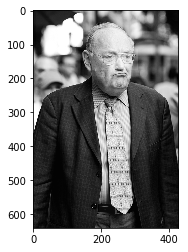

In [303]:
plt.imshow(new_img)
plt.show()

In [304]:
curr = buffer[2]['argmax'].tolist()[0]

curr_count = Counter(curr)

new_img = img.copy()
for i, bb in enumerate(bounding_boxes):
    x1, y1, x2, y2 = bb
    x1, x2 = int(x1 * img.shape[1]), int(x2 * img.shape[1])
    y1, y2 = int(y1 * img.shape[0]), int(y2 * img.shape[0])
    sub_img = img[y1: y2, x1: x2]
    white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255
    res = cv2.addWeighted(sub_img, 1.0 - curr_count[i]/2048, white_rect, curr_count[i]/2048, 1.0)
    new_img[y1:y2, x1: x2] = np.maximum(new_img[y1:y2, x1:x2], res)

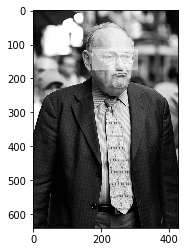

In [305]:
plt.imshow(new_img)
plt.show()